<a href="https://colab.research.google.com/github/Aryaman-Pachori/projectportfolio/blob/main/loan_default_analysis/loan-default-risk-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install scikeras

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scikeras.wrappers import KerasClassifier  # Import from scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score

# Function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load the data
train_data = pd.read_csv('/content/home_credit_default_risk/application_train.csv')
test_data = pd.read_csv('/content/home_credit_default_risk/application_test.csv')

# Preprocessing and feature engineering
train_data['DAYS_EMPLOYED'] = train_data['DAYS_EMPLOYED'].apply(lambda x: x if x > 0 else np.nan)
train_data['income_per_family'] = train_data['AMT_INCOME_TOTAL'] / (train_data['CNT_FAM_MEMBERS'] + 1)
train_data['log_credit'] = np.log1p(train_data['AMT_CREDIT'])

# Drop features that are unlikely to be useful
drop_columns = ['SK_ID_CURR', 'TARGET']
X = train_data.drop(drop_columns, axis=1)
y = train_data['TARGET']

# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Data Preprocessing Pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Update categorical pipeline to use OneHotEncoder instead of LabelEncoder
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use OneHotEncoder
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values after preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Handle any possible NaNs in the transformed data
if np.any(np.isnan(X_train)):
    print("NaN values found in the training data")
else:
    print("No NaN values in the training data")

# Create KerasClassifier using the Keras model
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=1)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'epochs': [10, 20],
    'batch_size': [32, 64],
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best hyperparameters from GridSearchCV
print(f'Best hyperparameters: {grid_search.best_params_}')

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.4f}')


No NaN values in the training data


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9121 - loss: 0.2858
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9200 - loss: 0.2555
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9180 - loss: 0.2558
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9212 - loss: 0.2480
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9196 - loss: 0.2481
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9183 - loss: 0.2494
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9174 - loss: 0.2515
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9176 - loss: 0.2482
Epoch 9/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9186 - loss: 0.2450
Epoch 10/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9178 - loss: 0.2448
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9074 - loss: 0.2932
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9184 - loss: 0.2605
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9180 - loss: 0.2563
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9176 - loss: 0.2562
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9188 - loss: 0.2530
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9183 - loss: 0.2512
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9193 - loss: 0.2476
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9194 - loss: 0.2448
Epoch 9/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9173 - loss: 0.2503
Epoch 10/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9187 - loss: 0.2460
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9058 - loss: 0.2930
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9189 - loss: 0.2592
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9184 - loss: 0.2547
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9189 - loss: 0.2527
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9181 - loss: 0.2534
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9201 - loss: 0.2473
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9187 - loss: 0.2481
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9200 - loss: 0.2439
Epoch 9/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9192 - loss: 0.2429
Epoch 10/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9191 - loss: 0.2431
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9104 - loss: 0.2854
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9197 - loss: 0.2567
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9194 - loss: 0.2524
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9189 - loss: 0.2521
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9178 - loss: 0.2546
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9193 - loss: 0.2492
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9198 - loss: 0.2468
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9175 - loss: 0.2486
Epoch 9/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9204 - loss: 0.2401
Epoch 10/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9191 - loss: 0.2437
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9150 - loss: 0.2824
Epoch 2/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9171 - loss: 0.2600
Epoch 3/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9174 - loss: 0.2574
Epoch 4/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9185 - loss: 0.2526
Epoch 5/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9178 - loss: 0.2540
Epoch 6/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9181 - loss: 0.2500
Epoch 7/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9198 - loss: 0.2460
Epoch 8/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9181 - loss: 0.2488
Epoch 9/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9197 - loss: 0.2445
Epoch 10/10
2679/2679 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9199 - loss: 0.2416
670/670 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Cross-validation scores: [0.91838163 0.91805497 0.91763114 0.91716446 0.9175

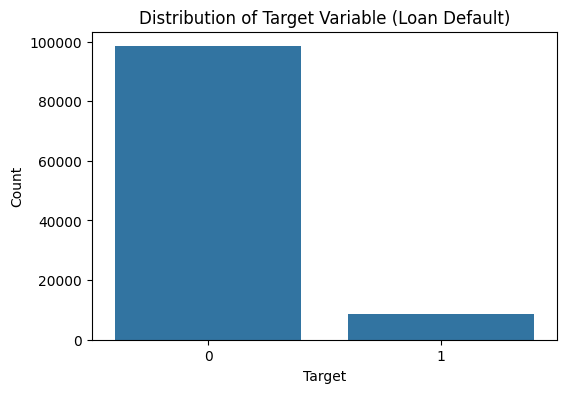

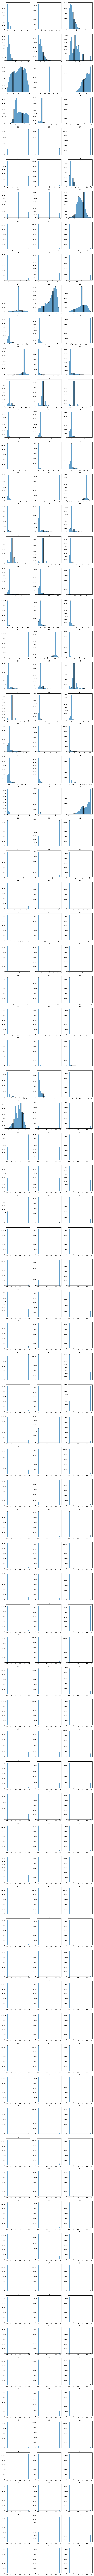

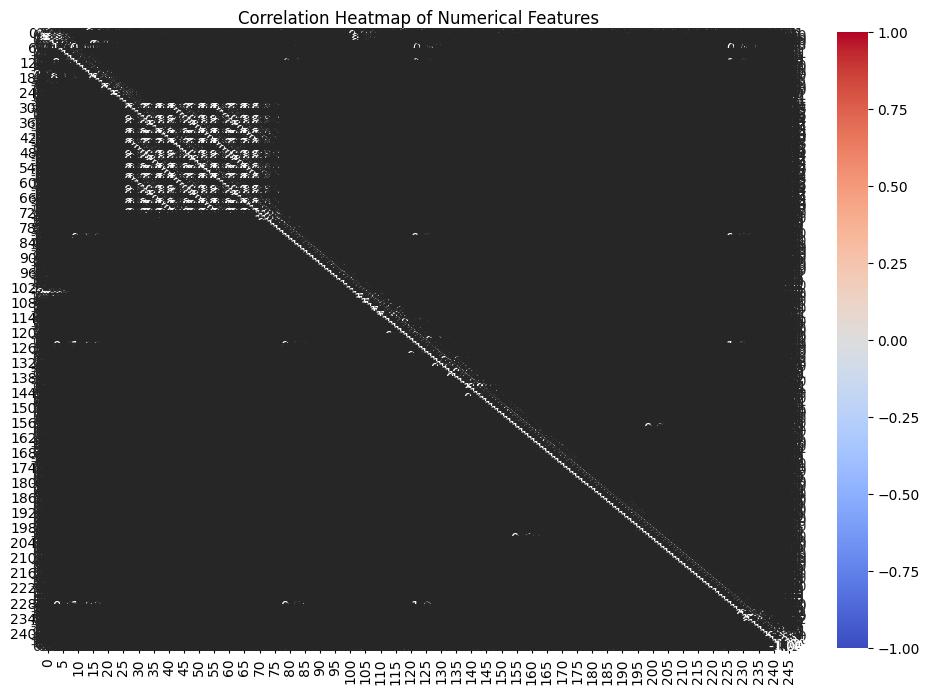

419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


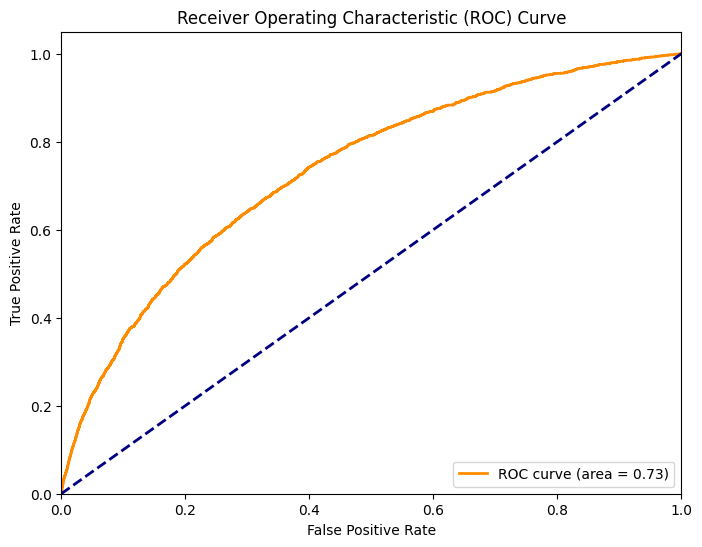

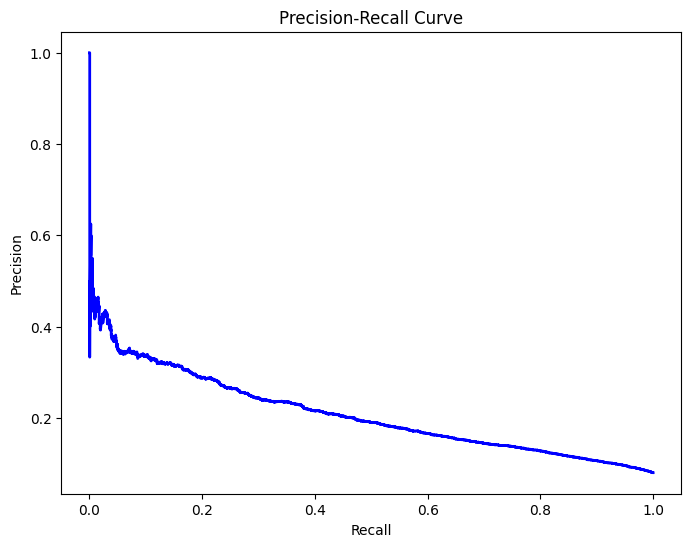


Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     24637
           1       0.52      0.01      0.01      2149

    accuracy                           0.92     26786
   macro avg       0.72      0.50      0.48     26786
weighted avg       0.89      0.92      0.88     26786



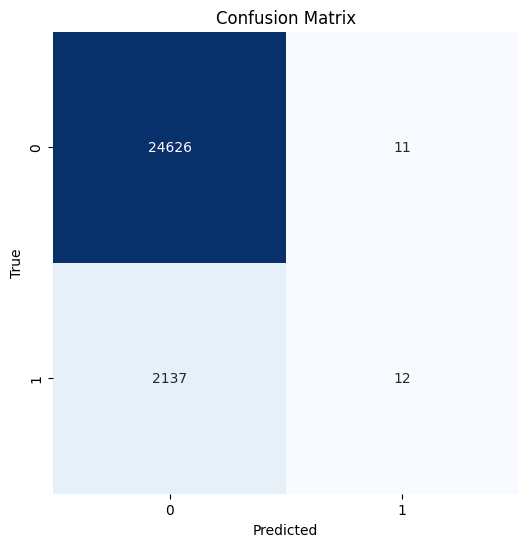

ROC AUC Score: 0.7340


In [ ]:
# Import additional libraries for visualizations
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
X_train = pd.DataFrame(X_train)

# Function to visualize the distribution of the target variable
def plot_target_distribution(y):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y)
    plt.title('Distribution of Target Variable (Loan Default)')
    plt.xlabel('Target')
    plt.ylabel('Count')
    plt.show()

# Function to visualize feature distributions

def plot_feature_distribution(X, feature_names=None):
    # Check if X is a pandas DataFrame
    if isinstance(X, pd.DataFrame):
        num_features = X.shape[1]  # Get the number of features
        feature_names = X.columns  # Use the column names from DataFrame
        X = X.values  # Convert DataFrame to numpy array for easy indexing
    else:
        num_features = X.shape[1]  # Get the number of features
        # Generate feature names if none are provided
        if feature_names is None:
            feature_names = [f'Feature {i+1}' for i in range(num_features)]

    cols = 3  # Number of columns for plotting
    rows = (num_features + cols - 1) // cols  # Calculate rows dynamically

    plt.figure(figsize=(12, 4 * rows))  # Adjust figure size based on rows
    for i in range(num_features):
        plt.subplot(rows, cols, i + 1)  # Adjust subplot grid dynamically
        plt.hist(X[:, i], bins=20, edgecolor='k', alpha=0.7)
        plt.title(feature_names[i])  # Use feature names for the title
    plt.tight_layout()  # Ensure plots fit in the figure
    plt.show()


# Function to plot the correlation heatmap
def plot_correlation_heatmap(X):
    corr_matrix = X.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()

# Function to plot the ROC curve
def plot_roc_curve(y_test, y_prob):
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot the Precision-Recall curve
def plot_precision_recall_curve(y_test, y_prob):
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Visualizations
plot_target_distribution(y_train)  # Visualize target distribution
plot_feature_distribution(X_train)  # Visualize numerical feature distributions
plot_correlation_heatmap(X_train)   # Visualize correlation heatmap

# Evaluate the model on the test set and plot performance curves
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# ROC and Precision-Recall curves
plot_roc_curve(y_test, y_prob)
plot_precision_recall_curve(y_test, y_prob)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.4f}')


With tensorFlow